In [1]:
# @title
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,#
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO #
# DESTE EP. #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM, #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM #
# DESONESTIDADE ACADÊMICA OU PLÁGIO. #
# #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP. #
# #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR #
# DESONESTIDADE ACADÊMICA. #
# #
# #
# Nome : William Garib Gugel
# NUSP : 11238131
# Turma: #
# Prof.: #
##################################################################

In [2]:
from ImageBase import ImageBase
import numpy as np
import pandas as pd
from cv2 import imwrite, cvtColor, COLOR_BGR2GRAY, resize
import matplotlib.pyplot as plt

In [3]:
x=ImageBase("./augmentedDataSet/")
x.data.reset_index(inplace=True)

y=ImageBase("./ImageBase/")

# Função que Faz a Equalização do Histograma

In [4]:
def equalizar(img):
    c = 255 / img.size
    aux = pd.Series(img.reshape(img.size)).value_counts()
    
    prob = [0] * 256
    for i in aux.index: prob[i] = aux[i]
    prob = np.array(prob)
    
    transfom = dict(zip(range(256), 256 * [0]))
    for k in range(256):
        transfom[k] = c * prob[0:k+1].sum()
    
    return np.vectorize(transfom.get)(img).round()

# Função que Cria os Arquivos Normalizados

In [5]:
def process():
    c = 1
    for i in x.data.index:
        name = x[i].id
        img = x.getById(i)
        name = str(x[i].path).split('\\', 1)[1].replace('\\', '/')

        imwrite('./normalizedDataSet/' + name, equalizar(img))
        
        if c % 100 == 0: print(c)
        c += 1

# Executando o Processo

In [6]:
# process()

# Mapeando as Imagens Geradas

In [7]:
z = ImageBase("./normalizedDataSet/")
z.data.reset_index(inplace=True)

# Calculo do Histograma

In [8]:
def soma_histogramas(lista, size):
    output = pd.Series(np.zeros(256))
    for img in lista:
        arq = x.getById(img)
        for i, soma in pd.Series(arq.reshape(arq.size)).value_counts().items():
            output.iloc[i] += soma
        # End For
    return output.astype(int)

In [9]:
histograma_interno = x.data[x.data.iluminacao == 'I'].index
qtd = histograma_interno.shape
interno = soma_histogramas(histograma_interno, 808800) / qtd

In [10]:
histograma_interno = x.data[x.data.iluminacao == 'E'].index
qtd = histograma_interno.shape
externo = soma_histogramas(histograma_interno, 808800) / qtd

In [11]:
histograma_interno = z.data[x.data.iluminacao == 'I'].index
qtd = histograma_interno.shape
interno_normalzado = soma_histogramas(histograma_interno, 808800) / qtd

C:\Users\WILLIA~1.GAR\AppData\Local\Temp/ipykernel_13244/2236314306.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  histograma_interno = z.data[x.data.iluminacao == 'I'].index


In [12]:
histograma_interno = z.data[x.data.iluminacao == 'E'].index
qtd = histograma_interno.shape
externo_normalzado = soma_histogramas(histograma_interno, 808800) / qtd

C:\Users\WILLIA~1.GAR\AppData\Local\Temp/ipykernel_13244/1664376308.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  histograma_interno = z.data[x.data.iluminacao == 'E'].index


# Plotando os Resultados

### Iluminação Interna

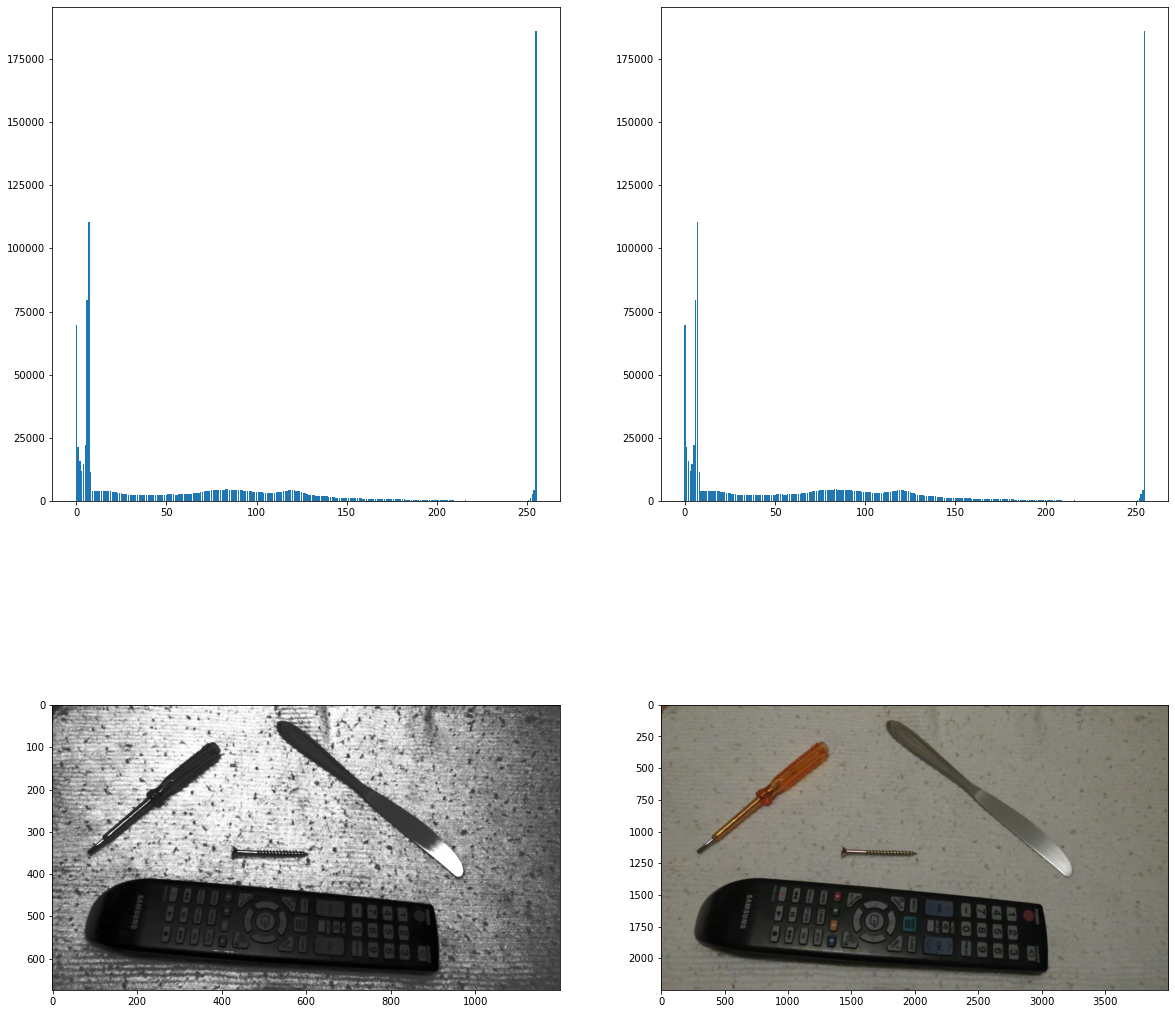

In [17]:
img, ax = plt.subplots(2,2, figsize=(20,20))
_=ax[0][1].bar(interno_normalzado.index, interno)
_=ax[0][0].bar(interno.index, interno)
_=ax[1][0].imshow(z.getById(33), 'gray')
_=ax[1][1].imshow(y.getById(x[33].id), 'gray')

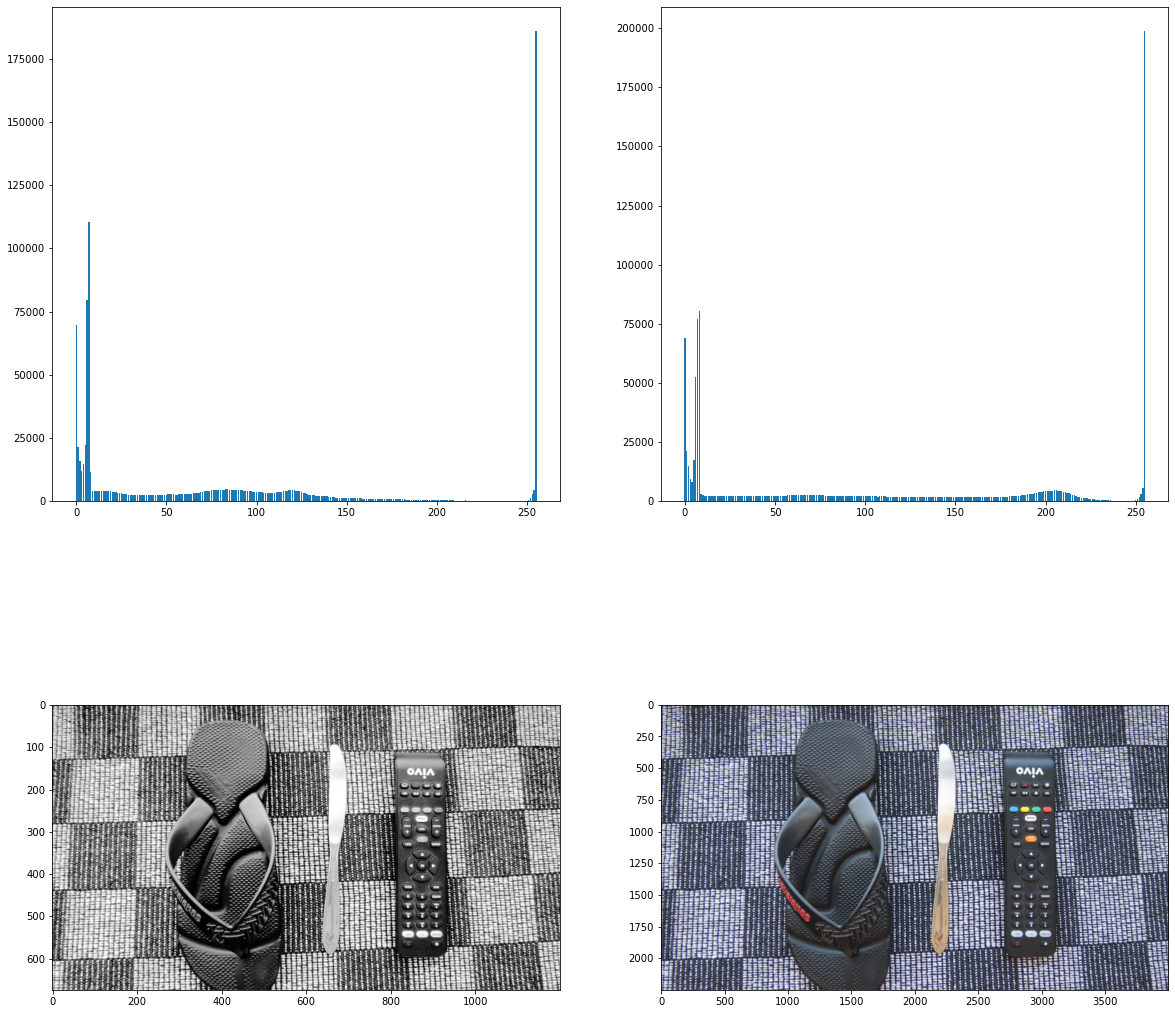

In [16]:
img, ax = plt.subplots(2,2, figsize=(20,20))
_=ax[0][1].bar(externo_normalzado.index, externo)
_=ax[0][0].bar(externo.index, interno)
_=ax[1][0].imshow(z.getById(18), 'gray')
_=ax[1][1].imshow(y.getById(x[18].id), 'gray')